*Use this notebook to complete the sentence similarity and embedding visualization tasks.*


# Your Tasks **(100 points)**

## Part 1: Data Preparation **(5 points)**

In [1]:
import torch
import gensim
from data_full import main
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pickle

## Part 2: Implement Word2Vec with PyTorch **(37 points)**

**Complete**

## Part 6: Comparing the trained models

In [2]:
with open("word2vec_embeddings.pkl", "rb") as f:
    pt = pickle.load(f)

pt_embeddings = pt["embeddings"]          # shape (V, 100)
pt_word2idx = pt["word2idx"]

In [3]:
with open("word2vec_gensim_embeddings.pkl", "rb") as f:
    g = pickle.load(f)

g_embeddings = g["embeddings"]   # numpy array
g_word2idx  = g["word2idx"]
g_idx2word  = g["idx2word"]

In [4]:
def g_vec(word):
    i = g_word2idx.get(word)
    return None if i is None else g_embeddings[i]


In [5]:
def pt_vec(word):
    i = pt_word2idx.get(word)
    return None if i is None else pt_embeddings[i]


In [6]:
from gensim.models import KeyedVectors

google_kv = KeyedVectors.load("word2vec-google-news-300.model")
fast_kv   = KeyedVectors.load("fasttext-wiki-news-subwords-300.model")

def google_vec(word):
    try:
        return google_kv[word]
    except KeyError:
        return None

def fast_vec(word):
    try:
        return fast_kv[word]
    except KeyError:
        return None

In [7]:
import nltk
nltk.download("punkt")
from nltk.tokenize import word_tokenize
import numpy as np

def tokenize_text(text):
    return word_tokenize(text.lower())

def sentence_embedding(tokens, vec_fn):
    vecs = [vec_fn(w) for w in tokens if vec_fn(w) is not None]
    if len(vecs) == 0:
        return None
    return np.mean(np.vstack(vecs), axis=0)

def cosine(a, b):
    return None if a is None or b is None else float(
        np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    )

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thatd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
sentences = [
    "The cat sat on the mat.",
    "A dog is playing in the yard.",
    "I need to buy groceries today.",
    "The feline was resting on the rug.",
    "Canines enjoy outdoor activities.",
    "My shopping list includes milk and bread.",
    "The weather is beautiful today.",
    "Programming requires logical thinking."
]

query = "My pet cat is sleeping on the carpet."

query_tokens = tokenize_text(query)
sent_tokens  = [tokenize_text(s) for s in sentences]

In [9]:
print("PyTorch Skip-Gram")
q = sentence_embedding(query_tokens, pt_vec)
for s, t in zip(sentences, sent_tokens):
    print(cosine(q, sentence_embedding(t, pt_vec)), "|", s)


PyTorch Skip-Gram
0.3582283854484558 | The cat sat on the mat.
0.16493530571460724 | A dog is playing in the yard.
0.05363570153713226 | I need to buy groceries today.
0.1674502044916153 | The feline was resting on the rug.
-0.006680342368781567 | Canines enjoy outdoor activities.
0.28867456316947937 | My shopping list includes milk and bread.
0.07082076370716095 | The weather is beautiful today.
-0.09632996469736099 | Programming requires logical thinking.


In [10]:
print("\nGensim Word2Vec (trained)")
q = sentence_embedding(query_tokens, g_vec)
for s, t in zip(sentences, sent_tokens):
    print(cosine(q, sentence_embedding(t, g_vec)), "|", s)


Gensim Word2Vec (trained)
0.675137460231781 | The cat sat on the mat.
0.581180989742279 | A dog is playing in the yard.
0.1873389333486557 | I need to buy groceries today.
0.4861820638179779 | The feline was resting on the rug.
0.07355412095785141 | Canines enjoy outdoor activities.
0.470125675201416 | My shopping list includes milk and bread.
0.49812284111976624 | The weather is beautiful today.
0.05491841211915016 | Programming requires logical thinking.


In [11]:
print("\nGoogle News Word2Vec")
q = sentence_embedding(query_tokens, google_vec)
for s, t in zip(sentences, sent_tokens):
    print(cosine(q, sentence_embedding(t, google_vec)), "|", s)



Google News Word2Vec
0.736871600151062 | The cat sat on the mat.
0.6482781767845154 | A dog is playing in the yard.
0.3717890679836273 | I need to buy groceries today.
0.7793821692466736 | The feline was resting on the rug.
0.4281468391418457 | Canines enjoy outdoor activities.
0.4969591498374939 | My shopping list includes milk and bread.
0.43101266026496887 | The weather is beautiful today.
0.29792308807373047 | Programming requires logical thinking.


In [12]:
print("\nFastText")
q = sentence_embedding(query_tokens, fast_vec)
for s, t in zip(sentences, sent_tokens):
    print(cosine(q, sentence_embedding(t, fast_vec)), "|", s)


FastText
0.9114079475402832 | The cat sat on the mat.
0.8511801362037659 | A dog is playing in the yard.
0.5858464241027832 | I need to buy groceries today.
0.924730122089386 | The feline was resting on the rug.
0.6504197716712952 | Canines enjoy outdoor activities.
0.8349564671516418 | My shopping list includes milk and bread.
0.8090365529060364 | The weather is beautiful today.
0.6134660840034485 | Programming requires logical thinking.


## Post-Sentence Summary

In [13]:
def pt_vec(w):
    i = pt_word2idx.get(w)
    return None if i is None else pt_embeddings[i]

def g_vec(w):
    i = g_word2idx.get(w)
    return None if i is None else g_embeddings[i]

def google_vec(w):
    try:
        return google_kv[w]
    except KeyError:
        return None

def fast_vec(w):
    try:
        return fast_kv[w]
    except KeyError:
        return None

In [14]:
animals = [
    'dog','cat','horse','cow','lion','tiger','elephant','giraffe',
    'eagle','hawk','sparrow','penguin','shark','whale','dolphin','tuna'
]
foods = [
    'apple','orange','banana','grape','bread','pasta','rice','potato',
    'chicken','beef','pork','fish','coffee','tea','juice','water'
]

def build_X(words_a, words_b, vec_fn):
    X, y, kept = [], [], []
    for w in words_a:
        v = vec_fn(w)
        if v is not None:
            X.append(v); y.append("animal"); kept.append(w)
    for w in words_b:
        v = vec_fn(w)
        if v is not None:
            X.append(v); y.append("food"); kept.append(w)
    return np.vstack(X), np.array(y), kept


In [15]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def plot_tsne(X, y, words, title):
    Z = TSNE(n_components=2, init="random", learning_rate="auto",
             perplexity=10, random_state=0).fit_transform(X)

    plt.figure(figsize=(7,6))
    for lab in ["animal","food"]:
        m = (y == lab)
        plt.scatter(Z[m,0], Z[m,1], label=lab)
    for i, w in enumerate(words):
        plt.text(Z[i,0], Z[i,1], w, fontsize=9)
    plt.title(title + " (t-SNE)")
    plt.legend()
    plt.show()

In [16]:
import umap

def plot_umap(X, y, words, title):
    reducer = umap.UMAP(n_components=2, n_neighbors=10, min_dist=0.1, random_state=0)
    Z = reducer.fit_transform(X)

    plt.figure(figsize=(7,6))
    for lab in ["animal","food"]:
        m = (y == lab)
        plt.scatter(Z[m,0], Z[m,1], label=lab)
    for i, w in enumerate(words):
        plt.text(Z[i,0], Z[i,1], w, fontsize=9)
    plt.title(title + " (UMAP)")
    plt.legend()
    plt.show()


PyTorch Skip-Gram (Text8, 100d) | plotted words: 32 | missing: 0


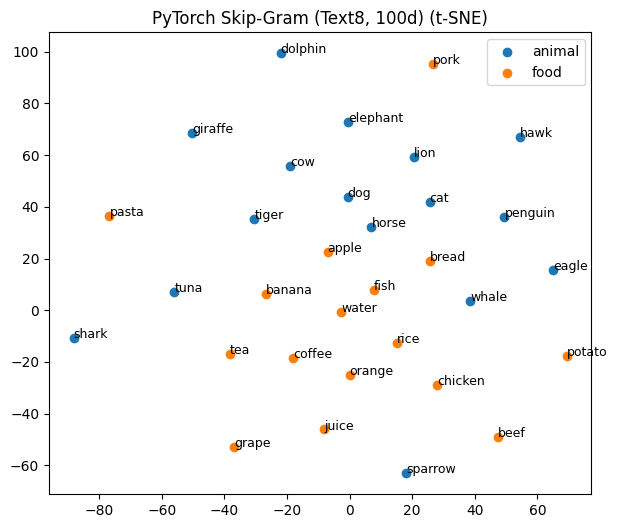

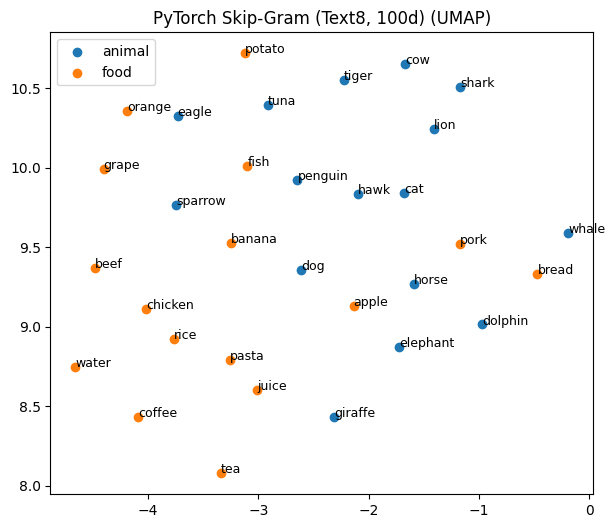

Gensim Word2Vec (Text8, 100d) | plotted words: 32 | missing: 0


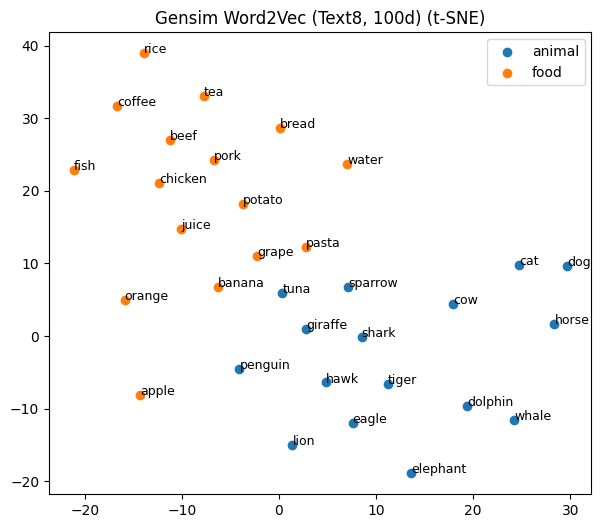

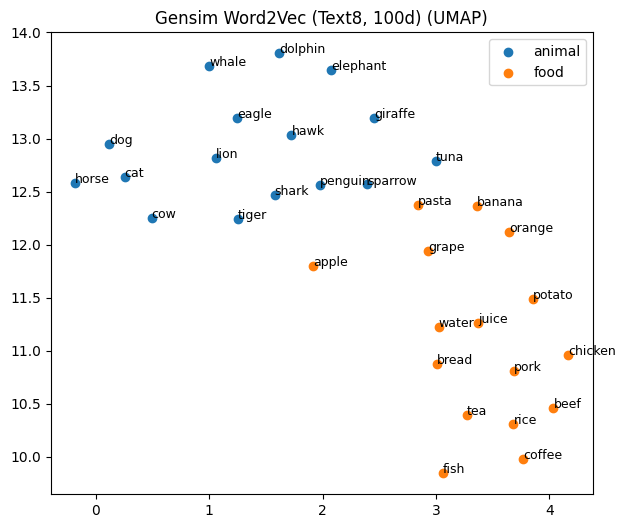

Google News Word2Vec (300d) | plotted words: 32 | missing: 0


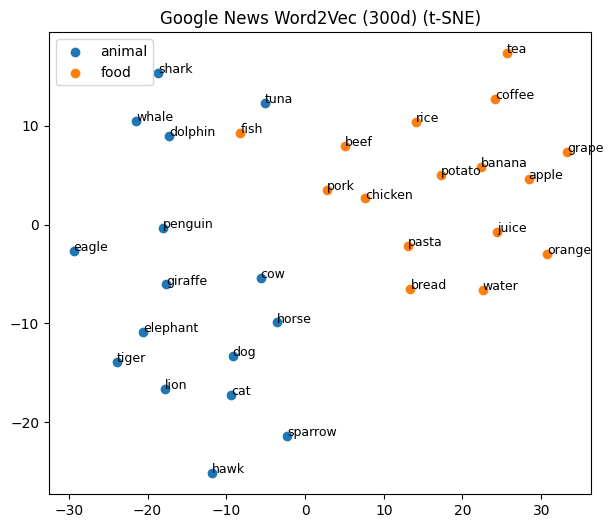

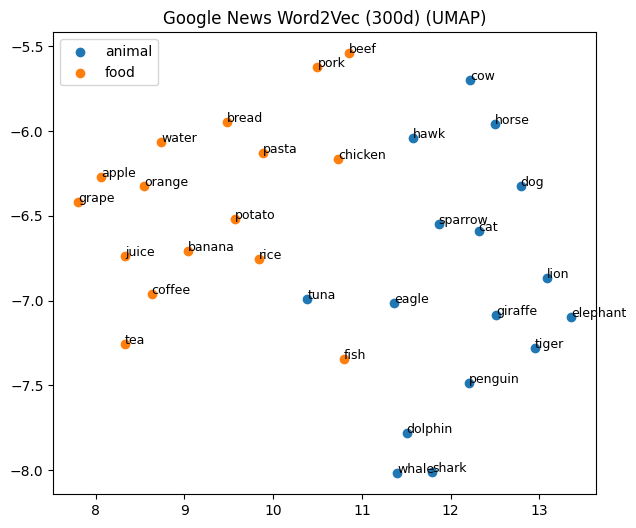

FastText (300d) | plotted words: 32 | missing: 0


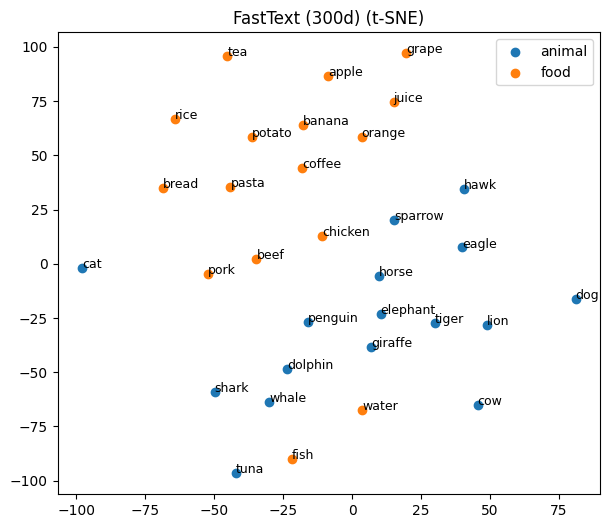

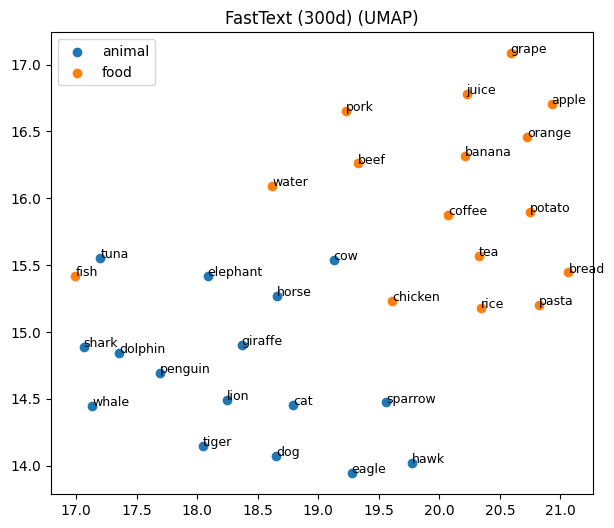

In [17]:
for name, vec_fn in [
    ("PyTorch Skip-Gram (Text8, 100d)", pt_vec),
    ("Gensim Word2Vec (Text8, 100d)", g_vec),
    ("Google News Word2Vec (300d)", google_vec),
    ("FastText (300d)", fast_vec),
]:
    X, y, words = build_X(animals, foods, vec_fn)
    print(name, "| plotted words:", len(words), "| missing:", 32 - len(words))
    plot_tsne(X, y, words, name)
    plot_umap(X, y, words, name)

## Part 7) Short Answer Questions **(10 points)**

### 1) Which embeddings performed best at capturing sentence meaning?

The pretrained Google News Word2Vec embeddings performed best generally at capturing sentence meaning. They assigned the highest cosine similarities to semantically related sentences. An example of this in the similarity scores was the "cat"/"feline" sentences that consistently ranked the highest among the sentences. They also maintained lower similarity to unrelated sentences. This behavior was generally consistent with the clearer semantic separation observed in both the t-SNE and UMAP visualizations. We can see that even though fish was classified as a food and tuna was classified as an animal there is slight intersection/crossover between the two words. Semantically, fish and tuna seemed very similar with one another and can appear in dual contexts of both food and animal.

### 2) Were the pretrained embeddings significantly better than your own? Why or why not?

The pretrained embeddings were significantly better than the embeddings that were trained from scratch. The pretrained models, specifically the Google News Word2Vec benefitted from training on billions of tokens which allowed them to capture richer semantic relationships. It also allowed them to capture synonymy or similar words like feline and cat that were absent or weak in the Text8-trained models. While the PyTorch and the Gensim-trained embeddings showed some semantic structure, it seemed that they were largely based on the size and the coverage of the Text8 corpus rather than any particular implementation correctness. I think that the data was what significantly limited the implementation of the model and the training.

### 3) What factors might explain the differences in performance?

The observed performance differences can be explained by several factors including corpus size, vocabulary coverage, and even model design. The way that the model was set up differs in that the pretrained embeddings were trained on substantially larger and more diverse datasets which enabled them to learn more robust semantic associations and synonyms. FastText also further incorporates subword information and improves coverage for rare or unseen words but also can lead to over-smoothing when sentence embeddings are formed via simple averaging. In contrast, the embeddings trained on the smaller Text8 corpus suffer from data sparsity which limits their ability to capture fine-grained semantic relationships and the granularity between certain words.

## AI Use Disclosure (Required)

If you used any AI-enabled tools (e.g., ChatGPT, GitHub Copilot, Claude, or other LLM assistants) while working on this assignment, you must disclose that use here. The goal is transparency-not punishment.

In your disclosure, briefly include:
- **Tool(s) used:** (name + version if known)
- **How you used them:** (e.g., concept explanation, debugging, drafting code, rewriting text)
- **What you verified yourself:** (e.g., reran the notebook, checked outputs/plots, checked shapes, read documentation)
- **What you did *not* use AI for (if applicable):** (optional)

You are responsible for the correctness of your submission, even if AI suggested code or explanations.

#### <font color="red">Write your disclosure here.</font>
I used ChatGPT for high level concept clarification like interpreting certain results and understanding the behavior between t-SNE and UMAP as well as debugging certain environment issues and dependency problems. Most prominently I used it to give me ideas on how to structure my code (though my code was notably not the most efficient). I also used it to help check and refine certain ideas myself.

**What I verified myself:**
I implemented and ran all code locally, reran the full notebook end-to-end and also verified that all the embeddings were loaded correctly, checked the tensor and array shapes and inspected the cosine similarity outputs. I also did all the visual examination of the t-SNE and UMAP plots myself to ensure that they matched the written interpretations and finally validated that the conclusions reflected the outputs produced by my code. I didn't use the AI to generate the trained embeddings themselves or run experiments. All models were my own execution.

## 🎁 Bonus Exploration (optional) **(15 points)**
Think creatively! Propose and implement your own method to explore or analyze word embeddings beyond the provided tasks. Feel free to create a new notebook for this task or include your exploration in the inspect_embeddings.ipynb notebook

Your idea could include (but is not limited to): - Word analogy tasks (e.g., king - man + woman ≈ queen) - Clustering words into semantic groups - Visualizing relationships between parts of speech - Detecting outliers or unusual word placements - Creating a mini application or visualization

Be original — any insightful or fun exploration that demonstrates your understanding of word embeddings will be considered!

In [18]:
def topk_analogy(vec_fn, vocab_words, a, b, c, k=5):
    va, vb, vc = vec_fn(a), vec_fn(b), vec_fn(c)
    if va is None or vb is None or vc is None:
        return None, "Missing one of the words in vocab"
    target = va - vb + vc

    best = []
    for w in vocab_words:
        vw = vec_fn(w)
        if vw is None or w in {a,b,c}:
            continue
        sim = float(np.dot(target, vw) / (np.linalg.norm(target) * np.linalg.norm(vw)))
        best.append((w, sim))
    best.sort(key=lambda x: x[1], reverse=True)
    return best[:k], None

In [19]:
pt_vocab = list(pt_word2idx.keys())
g_vocab  = list(g_word2idx.keys())

In [20]:
google_vocab = list(google_kv.key_to_index.keys())
fast_vocab   = list(fast_kv.key_to_index.keys())

In [21]:
tests = [("king","man","woman"), ("paris","france","italy")]

for (a,b,c) in tests:
    print("\nAnalogy:", a, "-", b, "+", c)
    for name, vec_fn, vocab in [
        ("PyTorch", pt_vec, pt_vocab),
        ("Gensim", g_vec, g_vocab),
        ("Google", google_vec, google_vocab),
        ("FastText", fast_vec, fast_vocab),
    ]:
        res, err = topk_analogy(vec_fn, vocab, a, b, c, k=5)
        print(name, "->", res if err is None else err)


Analogy: king - man + woman
PyTorch -> [('son', 0.4160799980163574), ('thy', 0.4039389491081238), ('franks', 0.3908267319202423), ('ware', 0.38615682721138), ('cannon', 0.382188618183136)]
Gensim -> [('queen', 0.6870810985565186), ('prince', 0.6462670564651489), ('princess', 0.6442346572875977), ('emperor', 0.635254442691803), ('empress', 0.6304712295532227)]
Google -> [('queen', 0.7300518155097961), ('monarch', 0.6454660892486572), ('princess', 0.6156250834465027), ('crown_prince', 0.5818676948547363), ('prince', 0.577711820602417)]
FastText -> [('queen', 0.75703364610672), ('queen-mother', 0.6896809339523315), ('king-', 0.6787334084510803), ('queen-consort', 0.6555202603340149), ('monarch', 0.6455854773521423)]

Analogy: paris - france + italy
PyTorch -> [('mason', 0.36964935064315796), ('brother', 0.3627732992172241), ('preparing', 0.3608742952346802), ('diocletian', 0.3580712676048279), ('treatise', 0.3549949824810028)]
Gensim -> [('venice', 0.7579831480979919), ('florence', 0.709

As an additional exploration I evaluated linear word analogies in the form a - b + c across all the embedding sources. The pretrained embeddings performed substantially better at recovering meaningful analogies and the PyTorch corpus ended up settling on "son" as the associated word. For example, the Google News Word2Vec correctly returned that *king - man + woman* results in *queen*, while the text8-trained PyTorch model failed to produce semantically relevant outputs. Similarly for the geographic analogies portion, *paris - france + italy* ended up yielding European cities in the pretrained models but not in the embeddings from scratch. These results illustrate that the linear semantic relationships emerge most clearly when embeddings are trained on large and diverse corpora and that FastText's subword modeling also introduces additional morphological sensitivity. I originally expected better performance of my model.

#### Capital-Country Analysis
The PyTorch model performs especially poorly here because it is trained from scratch on Text8 only with no phrase modeling and limited geographic coverage. It learns things like "paris" co-occurs with historical or narrative words while "france" occurs with political or cultural words but never a clean "capital-of" vector direction or example. It failed to recover clean capital-country relationships as a limitation of the model. For Gensim the analogy roughly points to the correct European "country-city" geometry but Florence, Venice, and Milan all appear more frequently and Word2Vec favors frequency. Google News is different since it's in the right semantic region but the analogy vector lands near geopolitical prominence. FastText returns Italia since it collapses to "Italy-ness" rather than "capital-of". I expected better performance from the other models or for at least one to get the word Rome but it seemed like none of them could reach that conclusion.